In [1]:
#| hide
%load_ext autoreload
%autoreload 2

In [4]:
from ids_finder.core.pipeline import ids_finder
from ids_finder.datasets import IDsDataset
from ids_finder.utils.basic import resample
from space_analysis.missions.psp.mag import load_data
from space_analysis.missions.psp.plasma import load_data as load_data_plasma
import polars as pl
from beforerr.polars import pl_norm
# from ids_finder.missions.psp.mag import load_data, download_data

In [5]:
from sunpy.time import TimeRange
from datetime import timedelta

In [6]:
start = '2019-04-06T12:00'
end = '2019-04-07T12:00'

earth_start = '2019-04-09'
earth_end = '2019-04-14'

In [7]:
psp_timerange = TimeRange(start, end)
timerange_earth = TimeRange(earth_start, earth_end)

In [8]:
def validate(timerange):
    if isinstance(timerange, TimeRange):
        return [timerange.start.to_string(), timerange.end.to_string()]

In [9]:
# tau = timedelta(seconds=60)
tau = timedelta(seconds=10)
ts = timedelta(seconds=1/264)

In [10]:
validate(psp_timerange)

['2019-04-06T12:00:00.000', '2019-04-07T12:00:00.000']

In [11]:
data = load_data(trange = validate(psp_timerange))

30-Jan-24 20:56:33 INFO     30-Jan-24 20:56:33: Downloading remote index:                           ]8;id=983395;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py\download.py]8;;\:]8;id=794661;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py#343\343]8;;\
                            https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2019/                        

30-Jan-24 20:56:34 INFO     30-Jan-24 20:56:34: File is current:                                    ]8;id=852729;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py\download.py]8;;\:]8;id=655094;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py#140\140]8;;\
                            /Users/zijin/data/psp/fields/l2/mag_rtn/2019/psp_fld_l2_mag_rtn_2019040                
                            612_v02.cdf                                                                            

                   INFO     30-Jan-24 20:56:34: File is current:                                    ]8;id=954697;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py\download.py]8;;\:]8;id=515052;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py#140\140]8;;\
                            /Users/zijin/data/psp/fields/l2/mag_rtn/2019/psp_fld_l2_mag_rtn_2019040                
                            618_v02.cdf                                                                            

                   INFO     30-Jan-24 20:56:34: File is current:                                    ]8;id=36670;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py\download.py]8;;\:]8;id=768415;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py#140\140]8;;\
                            /Users/zijin/data/psp/fields/l2/mag_rtn/2019/psp_fld_l2_mag_rtn_2019040                
                            700_v02.cdf                                                                            

                   INFO     30-Jan-24 20:56:34: File is current:                                    ]8;id=337060;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py\download.py]8;;\:]8;id=648098;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py#140\140]8;;\
                            /Users/zijin/data/psp/fields/l2/mag_rtn/2019/psp_fld_l2_mag_rtn_2019040                
                            706_v02.cdf                                                                            

In [12]:
candidate = ids_finder(data, tau, ts)

30-Jan-24 20:56:38 WARNING  30-Jan-24 20:56:38: UserWarning: Converting non-nanosecond precision      ]8;id=386235;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=758143;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            datetime values to nanosecond precision. This behavior can eventually be               
                            relaxed in xarray, as it is an artifact from pandas which is now                       
                            beginning to support non-nanosecond precision values. This warning is                  
                            caused by passing non-nanosecond np.datetime64 or np.timedelta64 values                
                            to the DataArray or Variable constructor; it can be silenced by                        
                            converting the values to nanosecond precision ahead of time.                           
                                                                                                                   

                   WARNING  30-Jan-24 20:56:38: UserWarning: Ray execution environment not yet        ]8;id=140091;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=668004;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            initialized. Initializing...                                                           
                            To remove this warning, run the following python code before doing                     
                            dataframe operations:                                                                  
                                                                                                                   
                                import ray                                                                         
                                ray.init()                                                                         
                                                                                                                   
                                                                                                                   

2024-01-30 20:56:40,397	INFO worker.py:1724 -- Started a local Ray instance.


30-Jan-24 20:56:41 WARNING  30-Jan-24 20:56:41: UserWarning: Distributing <class                      ]8;id=692362;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=869047;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            'pandas.core.frame.DataFrame'> object. This may take some time.                        
                                                                                                                   

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

                   INFO     30-Jan-24 20:56:41: Using sequential splitting in               ]8;id=708183;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py\partition_manager.py]8;;\:]8;id=17825;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py#89\89]8;;\
                            '.from_pandas()' because of some of the conditions are False:                          
                            enough_elements=False; all_numeric_types=False;                                        
                            async_mode_on=False                                                                    

(_deploy_ray_func pid=21291) UserWarning: Traceback (most recent call last):
(_deploy_ray_func pid=21291)   File "/Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pdpipe/__init__.py", line 85, in <module>
(_deploy_ray_func pid=21291)     from . import skintegrate
(_deploy_ray_func pid=21291)   File "/Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pdpipe/skintegrate.py", line 20, in <module>
(_deploy_ray_func pid=21291)     from sklearn.base import BaseEstimator
(_deploy_ray_func pid=21291) ModuleNotFoundError: No module named 'sklearn'
(_deploy_ray_func pid=21291) 
(_deploy_ray_func pid=21291) UserWarning: pdpipe: Scikit-learn or skutil import failed. Scikit-learn-dependent pipeline stages will not be loaded.
(_deploy_ray_func pid=21291) UserWarning: Traceback (most recent call last):
(_deploy_ray_func pid=21291)   File "/Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pdpipe/__init__.py", line 105, in <module>

Estimated completion of line 1:   0%           Elapsed time: 00:00, estimated remaining time: ?

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

30-Jan-24 20:56:42 INFO     30-Jan-24 20:56:42: Using sequential splitting in               ]8;id=364076;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py\partition_manager.py]8;;\:]8;id=883876;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py#89\89]8;;\
                            '.from_pandas()' because of some of the conditions are False:                          
                            enough_elements=False; all_numeric_types=False;                                        
                            async_mode_on=False                                                                    

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

                   INFO     30-Jan-24 20:56:42: Using sequential splitting in               ]8;id=393727;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py\partition_manager.py]8;;\:]8;id=876815;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py#89\89]8;;\
                            '.from_pandas()' because of some of the conditions are False:                          
                            enough_elements=False; all_numeric_types=True;                                         
                            async_mode_on=False                                                                    

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

                   INFO     30-Jan-24 20:56:42: Using sequential splitting in               ]8;id=220741;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py\partition_manager.py]8;;\:]8;id=371413;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py#89\89]8;;\
                            '.from_pandas()' because of some of the conditions are False:                          
                            enough_elements=False; all_numeric_types=False;                                        
                            async_mode_on=False                                                                    

In [13]:
psp_ids_dataset = IDsDataset(
    candidates = candidate,
    data = data
)

Examples of discontinuities observed by PSP

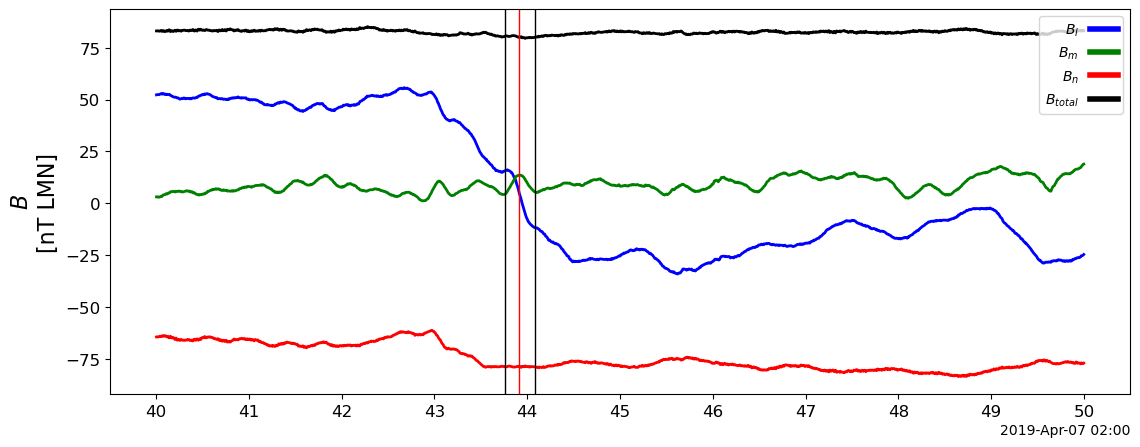

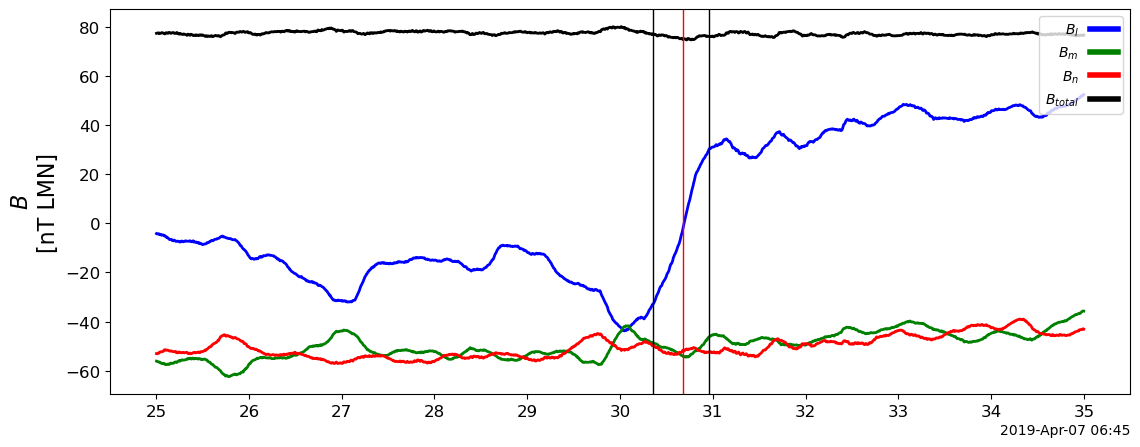

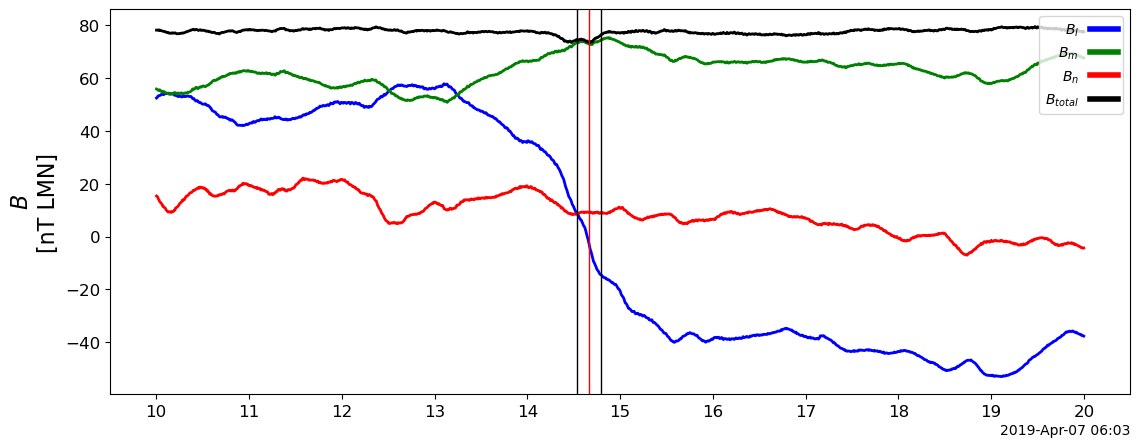

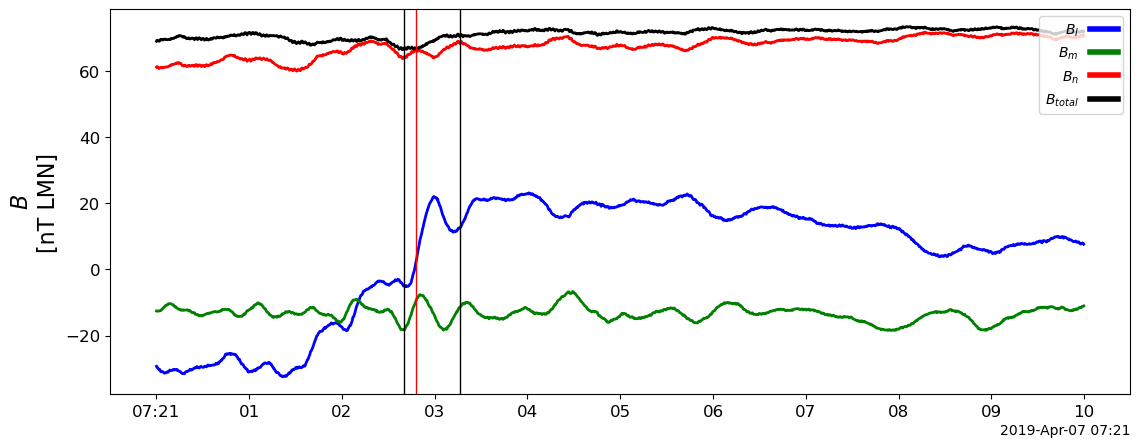

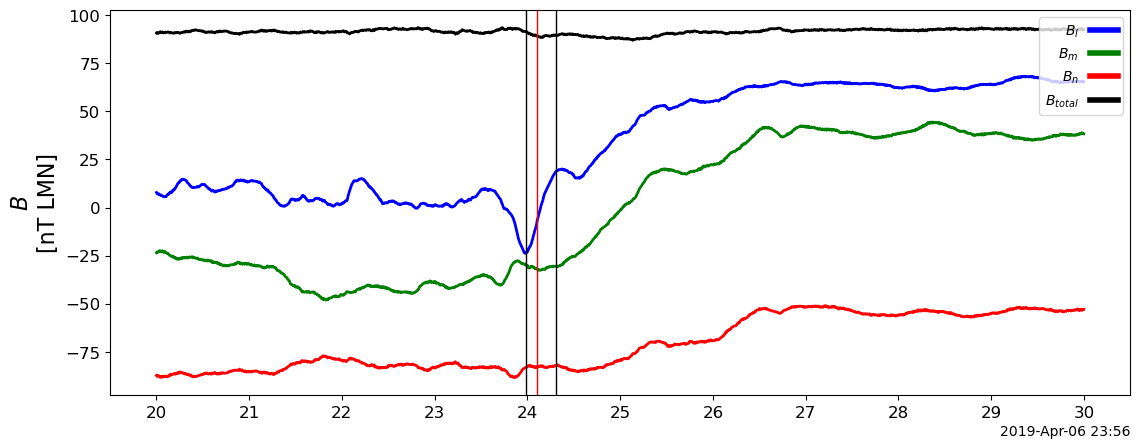

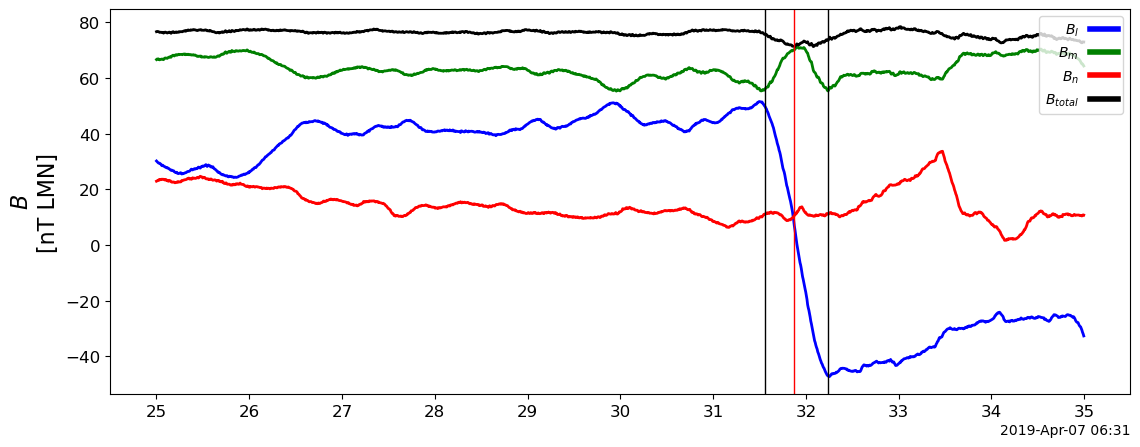

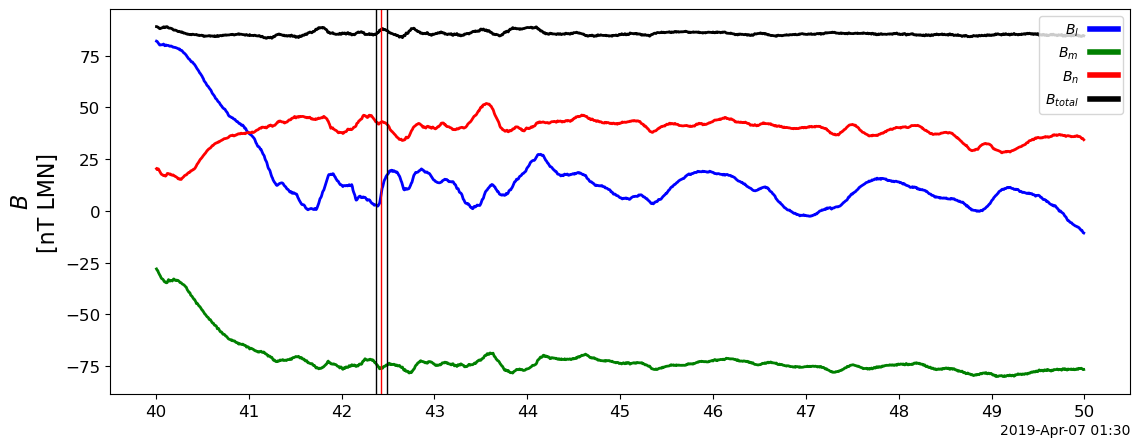

In [14]:
#| column: screen
#| layout-ncol: 3

# psp_ids_dataset.plot_candidates()
good_indices = [87, 285, 121, 128, 69, 282, 81]
figs = psp_ids_dataset.plot_candidates(good_indices, display=False)

By visually inspecting data, the most strong discontinuities kind of have time duration about 1-3 seconds. 
So it is reasonable to downsample the data to a lower frequency so that 

- the detection method is more robust, excluding very high frequency wave/noise?
- it is better to apply the derivative method to get the properties of the discontinuities.
- Match `Wind ` time resolution.

Or we could fit the $B_l$ to get the properties of the discontinuities.

In [15]:
every = timedelta(seconds=1/11)

# tau = timedelta(seconds=60)
tau = timedelta(seconds=10)
ts = timedelta(seconds=1/11)

data_r = resample(data, every)

In [16]:
candidates_r = ids_finder(data_r, tau, ts)

30-Jan-24 20:56:47 WARNING  30-Jan-24 20:56:47: DeprecationWarning: `pl.count()` is deprecated.       ]8;id=559161;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=109437;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            Please use `pl.len()` instead.                                                         
                                                                                                                   

                   WARNING  30-Jan-24 20:56:47: DeprecationWarning: `map_alias` is deprecated. It has ]8;id=121074;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=472277;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            been moved to `name.map`.                                                              
                                                                                                                   

                   WARNING  30-Jan-24 20:56:47: DeprecationWarning: `map_alias` is deprecated. It has ]8;id=763950;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=119479;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            been moved to `name.map`.                                                              
                                                                                                                   

30-Jan-24 20:56:49 WARNING  30-Jan-24 20:56:49: UserWarning: Converting non-nanosecond precision      ]8;id=633793;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=466281;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            datetime values to nanosecond precision. This behavior can eventually be               
                            relaxed in xarray, as it is an artifact from pandas which is now                       
                            beginning to support non-nanosecond precision values. This warning is                  
                            caused by passing non-nanosecond np.datetime64 or np.timedelta64 values                
                            to the DataArray or Variable constructor; it can be silenced by                        
                            converting the values to nanosecond precision ahead of time.                           
                                                                                                                   

                   WARNING  30-Jan-24 20:56:49: UserWarning: Distributing <class                      ]8;id=332354;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=462949;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            'pandas.core.frame.DataFrame'> object. This may take some time.                        
                                                                                                                   

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

                   INFO     30-Jan-24 20:56:49: Using sequential splitting in               ]8;id=104563;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py\partition_manager.py]8;;\:]8;id=33414;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py#89\89]8;;\
                            '.from_pandas()' because of some of the conditions are False:                          
                            enough_elements=False; all_numeric_types=False;                                        
                            async_mode_on=False                                                                    

Estimated completion of line 1:   0%           Elapsed time: 00:00, estimated remaining time: ?

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

30-Jan-24 20:56:50 INFO     30-Jan-24 20:56:50: Using sequential splitting in               ]8;id=678682;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py\partition_manager.py]8;;\:]8;id=420858;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py#89\89]8;;\
                            '.from_pandas()' because of some of the conditions are False:                          
                            enough_elements=False; all_numeric_types=False;                                        
                            async_mode_on=False                                                                    

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

                   INFO     30-Jan-24 20:56:50: Using sequential splitting in               ]8;id=355506;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py\partition_manager.py]8;;\:]8;id=393936;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py#89\89]8;;\
                            '.from_pandas()' because of some of the conditions are False:                          
                            enough_elements=False; all_numeric_types=True;                                         
                            async_mode_on=False                                                                    

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

                   INFO     30-Jan-24 20:56:50: Using sequential splitting in               ]8;id=234509;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py\partition_manager.py]8;;\:]8;id=252202;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/modin/core/execution/ray/implementations/pandas_on_ray/partitioning/partition_manager.py#89\89]8;;\
                            '.from_pandas()' because of some of the conditions are False:                          
                            enough_elements=False; all_numeric_types=False;                                        
                            async_mode_on=False                                                                    

In [17]:
var_names = ["DENS", "VEL_RTN_SUN", "TEMP", "SUN_DIST"]
vec_cols=[f"VEL_RTN_SUN_{i}" for i in range(3)]

psp_plasma = load_data_plasma(trange = validate(psp_timerange), var_names=var_names)
psp_plasma_r = psp_plasma.pipe(resample, every=tau).with_columns(
    plasma_speed = pl_norm(vec_cols)
).rename({
    "DENS": "plasma_density",
    "TEMP": "plasma_temperature",
})

Using LEVEL=L3


                   INFO     30-Jan-24 20:56:50: Downloading remote index:                           ]8;id=735033;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py\download.py]8;;\:]8;id=687092;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py#343\343]8;;\
                            https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf00_l3_mom/20                
                            19/                                                                                    

                   INFO     30-Jan-24 20:56:50: File is current:                                    ]8;id=552145;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py\download.py]8;;\:]8;id=449365;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py#140\140]8;;\
                            /Users/zijin/data/psp/sweap/spi/l3/spi_sf00_l3_mom/2019/psp_swp_spi_sf0                
                            0_l3_mom_20190406_v04.cdf                                                              

                   INFO     30-Jan-24 20:56:50: File is current:                                    ]8;id=115354;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py\download.py]8;;\:]8;id=610515;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pyspedas/utilities/download.py#140\140]8;;\
                            /Users/zijin/data/psp/sweap/spi/l3/spi_sf00_l3_mom/2019/psp_swp_spi_sf0                
                            0_l3_mom_20190407_v04.cdf                                                              

In [18]:
psp_ids_dataset = IDsDataset(
    candidates = candidates_r.filter(pl.col('index_diff')>1),
    data = data_r,
    plasma_data = psp_plasma_r,
    vec_cols = vec_cols
)

psp_ids_dataset.update_candidates_with_plasma_data()

30-Jan-24 20:56:51 WARNING  30-Jan-24 20:56:51: PendingDeprecationWarning: The `dims` argument has    ]8;id=628411;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=845648;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            been renamed to `dim`, and will be removed in the future. This renaming                
                            is taking place throughout xarray over the next few releases.                          
                                                                                                                   

                   WARNING  30-Jan-24 20:56:51: PendingDeprecationWarning: The `dims` argument has    ]8;id=832087;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=797950;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            been renamed to `dim`, and will be removed in the future. This renaming                
                            is taking place throughout xarray over the next few releases.                          
                                                                                                                   

                   WARNING  30-Jan-24 20:56:51: PendingDeprecationWarning: The `dims` argument has    ]8;id=488801;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=826266;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            been renamed to `dim`, and will be removed in the future. This renaming                
                            is taking place throughout xarray over the next few releases.                          
                                                                                                                   

                   WARNING  30-Jan-24 20:56:51: DeprecationWarning: `nanoseconds` is deprecated. It   ]8;id=878056;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=321157;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            has been renamed to `total_nanoseconds`.                                               
                                                                                                                   

                   WARNING  30-Jan-24 20:56:51: DeprecationWarning: `nanoseconds` is deprecated. It   ]8;id=600348;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=691050;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            has been renamed to `total_nanoseconds`.                                               
                                                                                                                   

                   WARNING  30-Jan-24 20:56:51: DeprecationWarning: `nanoseconds` is deprecated. It   ]8;id=213194;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=34955;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            has been renamed to `total_nanoseconds`.                                               
                                                                                                                   

2024-01-30 21:21:55.968 | INFO     | ids_finder.datasets:plot_candidates:67 - Candidates indices: [9, 3, 11, 10]


30-Jan-24 21:21:56 WARNING  30-Jan-24 21:21:56: UserWarning: Converting non-nanosecond precision      ]8;id=39246;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=962323;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            datetime values to nanosecond precision. This behavior can eventually be               
                            relaxed in xarray, as it is an artifact from pandas which is now                       
                            beginning to support non-nanosecond precision values. This warning is                  
                            caused by passing non-nanosecond np.datetime64 or np.timedelta64 values                
                            to the DataArray or Variable constructor; it can be silenced by                        
                            converting the values to nanosecond precision ahead of time.                           
                                                                                                                   

                   WARNING  30-Jan-24 21:21:56: UserWarning: Converting non-nanosecond precision      ]8;id=876835;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=403088;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            datetime values to nanosecond precision. This behavior can eventually be               
                            relaxed in xarray, as it is an artifact from pandas which is now                       
                            beginning to support non-nanosecond precision values. This warning is                  
                            caused by passing non-nanosecond np.datetime64 or np.timedelta64 values                
                            to the DataArray or Variable constructor; it can be silenced by                        
                            converting the values to nanosecond precision ahead of time.                           
                                                                                                                   

                   WARNING  30-Jan-24 21:21:56: UserWarning: Converting non-nanosecond precision      ]8;id=675982;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=652126;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            datetime values to nanosecond precision. This behavior can eventually be               
                            relaxed in xarray, as it is an artifact from pandas which is now                       
                            beginning to support non-nanosecond precision values. This warning is                  
                            caused by passing non-nanosecond np.datetime64 or np.timedelta64 values                
                            to the DataArray or Variable constructor; it can be silenced by                        
                            converting the values to nanosecond precision ahead of time.                           
                                                                                                                   

30-Jan-24 21:21:57 WARNING  30-Jan-24 21:21:57: UserWarning: Converting non-nanosecond precision      ]8;id=573133;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=967936;file:///Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/astropy/logger.py#205\205]8;;\
                            datetime values to nanosecond precision. This behavior can eventually be               
                            relaxed in xarray, as it is an artifact from pandas which is now                       
                            beginning to support non-nanosecond precision values. This warning is                  
                            caused by passing non-nanosecond np.datetime64 or np.timedelta64 values                
                            to the DataArray or Variable constructor; it can be silenced by                        
                            converting the values to nanosecond precision ahead of time.                           
                                                                                                                   


[
    (
        <Figure size 1200x500 with 1 Axes>,
        <Axes: title={'center': '$V_i: 380.32 \\mathrm{km/s}$, $n_i: 95.51 \\mathrm{cm}^{-3}$, $T_i: 56.84 \\mathrm{eV}$'}, ylabel='$B$\n[nT LMN]'>
    ),
    (
        <Figure size 1200x500 with 1 Axes>,
        <Axes: title={'center': '$V_i: 392.90 \\mathrm{km/s}$, $n_i: 119.73 \\mathrm{cm}^{-3}$, $T_i: 42.46 \\mathrm{eV}$'}, ylabel='$B$\n[nT LMN]'>
    ),
    (
        <Figure size 1200x500 with 1 Axes>,
        <Axes: title={'center': '$V_i: 357.01 \\mathrm{km/s}$, $n_i: 93.86 \\mathrm{cm}^{-3}$, $T_i: 55.01 \\mathrm{eV}$'}, ylabel='$B$\n[nT LMN]'>
    ),
    (
        <Figure size 1200x500 with 1 Axes>,
        <Axes: title={'center': '$V_i: 362.94 \\mathrm{km/s}$, $n_i: 106.27 \\mathrm{cm}^{-3}$, $T_i: 51.21 \\mathrm{eV}$'}, ylabel='$B$\n[nT LMN]'>
    )
]

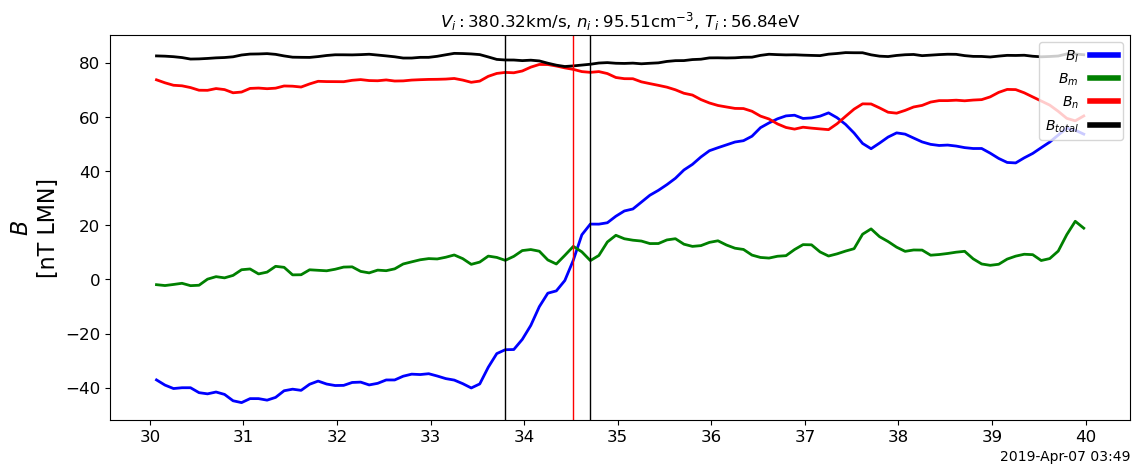

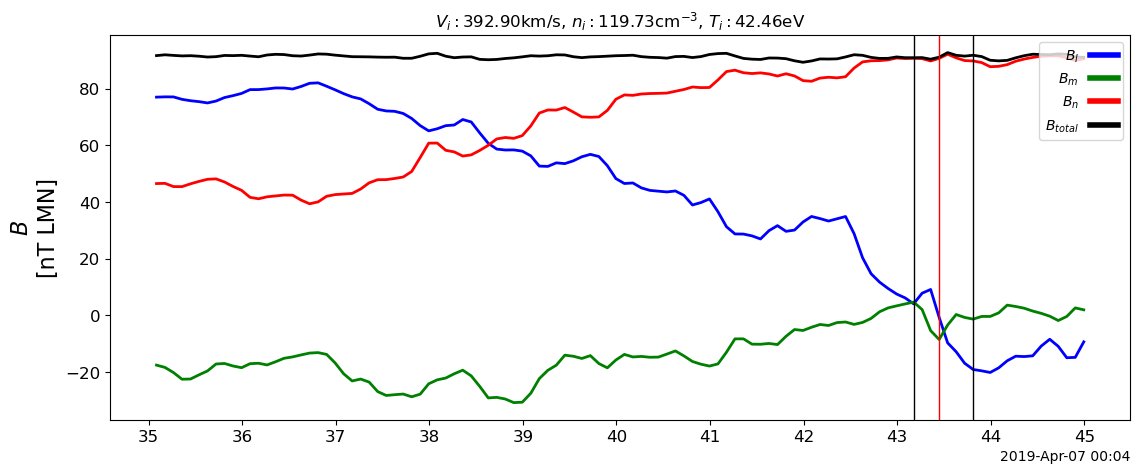

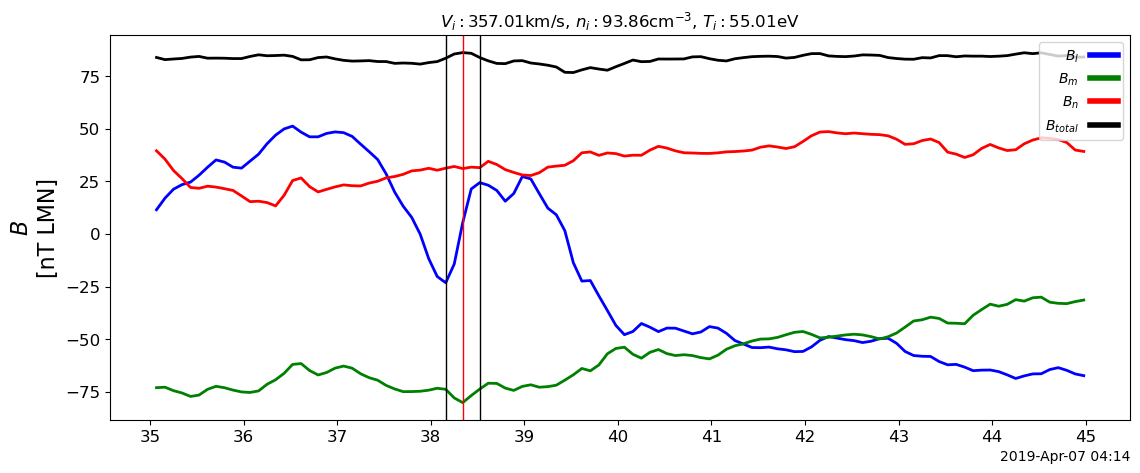

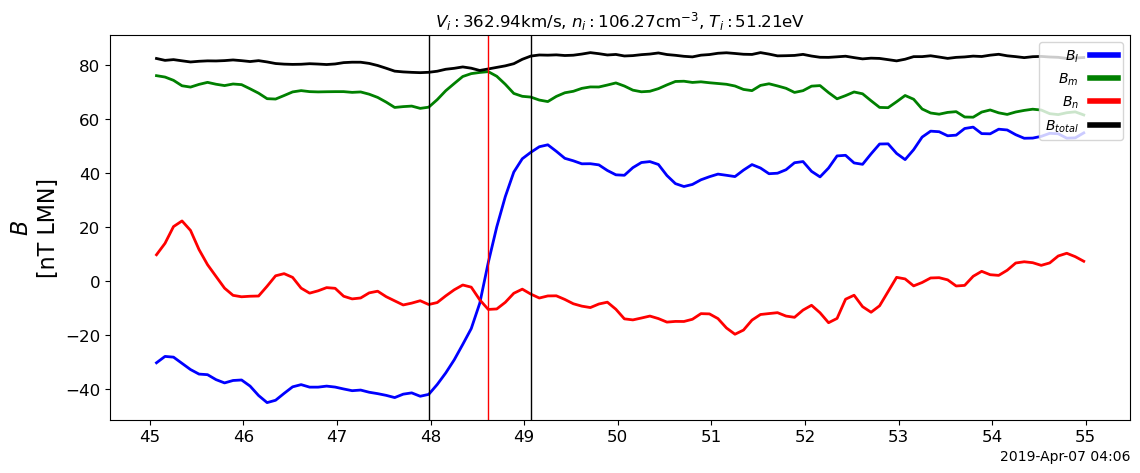

In [29]:
psp_ids_dataset.plot_candidates(add_plasma_params=True)